In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import functools
import pvtrace
import scintillator_tracer as st


ANGLE = 90

# Verification

In [3]:
crystal_kwargs = dict(material=st.definitions.LYSO(absorption_coefficient=1/50))
func = functools.partial(st.worlds.build_isosceles_triangle_world, ANGLE, crystal_kwargs=crystal_kwargs)
nodes = func()
world = nodes['world']

height = st.geometry_helpers.get_node_height(nodes['crystal'])
light = st.definitions.generate_scintillated_light_node(world)
light.location = (0, 0, height/2)

scene = pvtrace.Scene(world)
vis = pvtrace.MeshcatRenderer(wireframe=False, open_browser=True)
vis.render(scene)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7048/static/


# Grid trials

In [ ]:
nodes = func()
crystal = nodes['crystal']

zrange = (
    st.geometry_helpers.min_physical_value(crystal, 'z')+0.4,
    st.geometry_helpers.max_physical_value(crystal, 'z')-0.2,
)
yrange = (
    st.geometry_helpers.min_physical_value(crystal, 'y')+0.5,
    st.geometry_helpers.max_physical_value(crystal, 'y')-0.5,
)

# print(st.geometry_helpers.convert_vertices_to_physical(crystal))
# print(st.geometry_helpers.convert_vertices_to_physical(nodes['esr_shell']))


# for c in ['x', 'y', 'z']:
#     print(c)

#     crystal_maxz = st.geometry_helpers.max_physical_value(crystal, c)
#     shell_maxz = st.geometry_helpers.max_physical_value(nodes['esr_shell'], c)
#     print('\tmax diff:', crystal_maxz - shell_maxz)

#     crystal_minz = st.geometry_helpers.min_physical_value(crystal, c)
#     shell_minz = st.geometry_helpers.min_physical_value(nodes['esr_shell'], c)
#     print('\tmin diff:', crystal_minz - shell_minz)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7049/static/


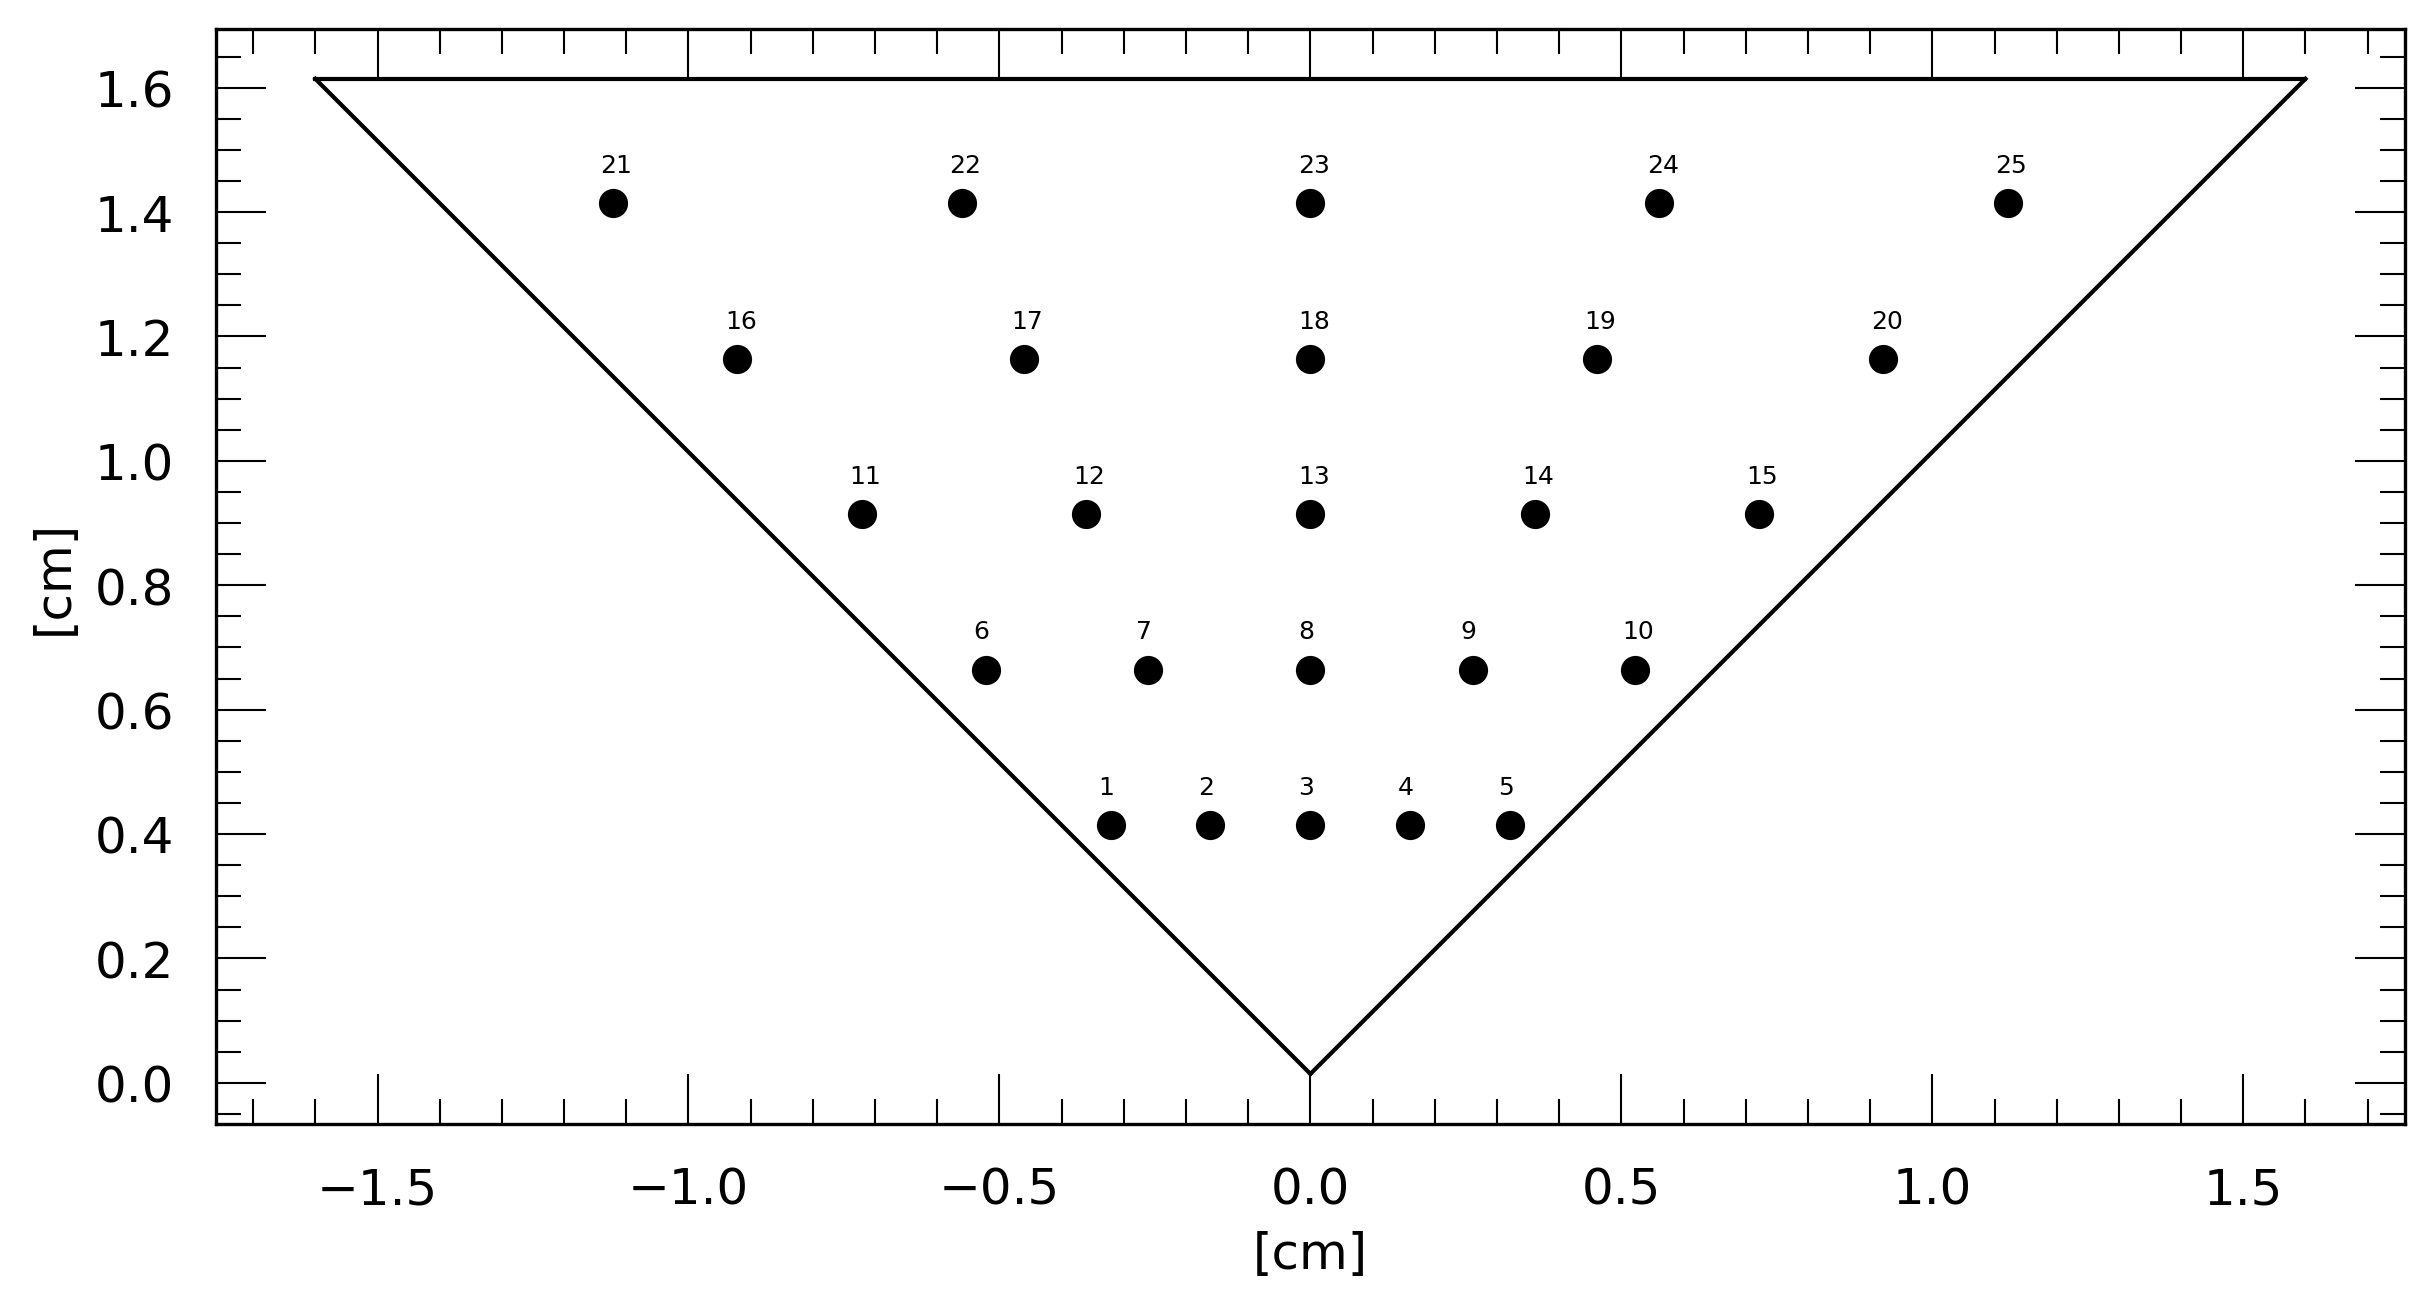

In [5]:
steps = 5
man = st.processing.Manager(func, out_dir=f'isosceles_triangle_{ANGLE}deg/')
man.define_grid(
    vertical_range=zrange,
    horizontal_func=lambda z: (-0.8*z+0.01, -(-0.8*z+0.01)),
    steps=steps,
    visualize=True
)

## Run

In [6]:
runs = man.run(200, seed=100, visualize=False)

/home/reed/Documents/research/grimpress/crystal-geometry/scintillator_tracer/plotting.py:91: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  C = ax.pcolormesh(Y, Z, surface, **pcolorkwargs)


isosceles_triangle_90deg/runs_20240720T121615/figures/crystal_absorbed.png
isosceles_triangle_90deg/runs_20240720T121615/figures/optical pad_absorbed.png
isosceles_triangle_90deg/runs_20240720T121615/figures/sipm_absorbed.png


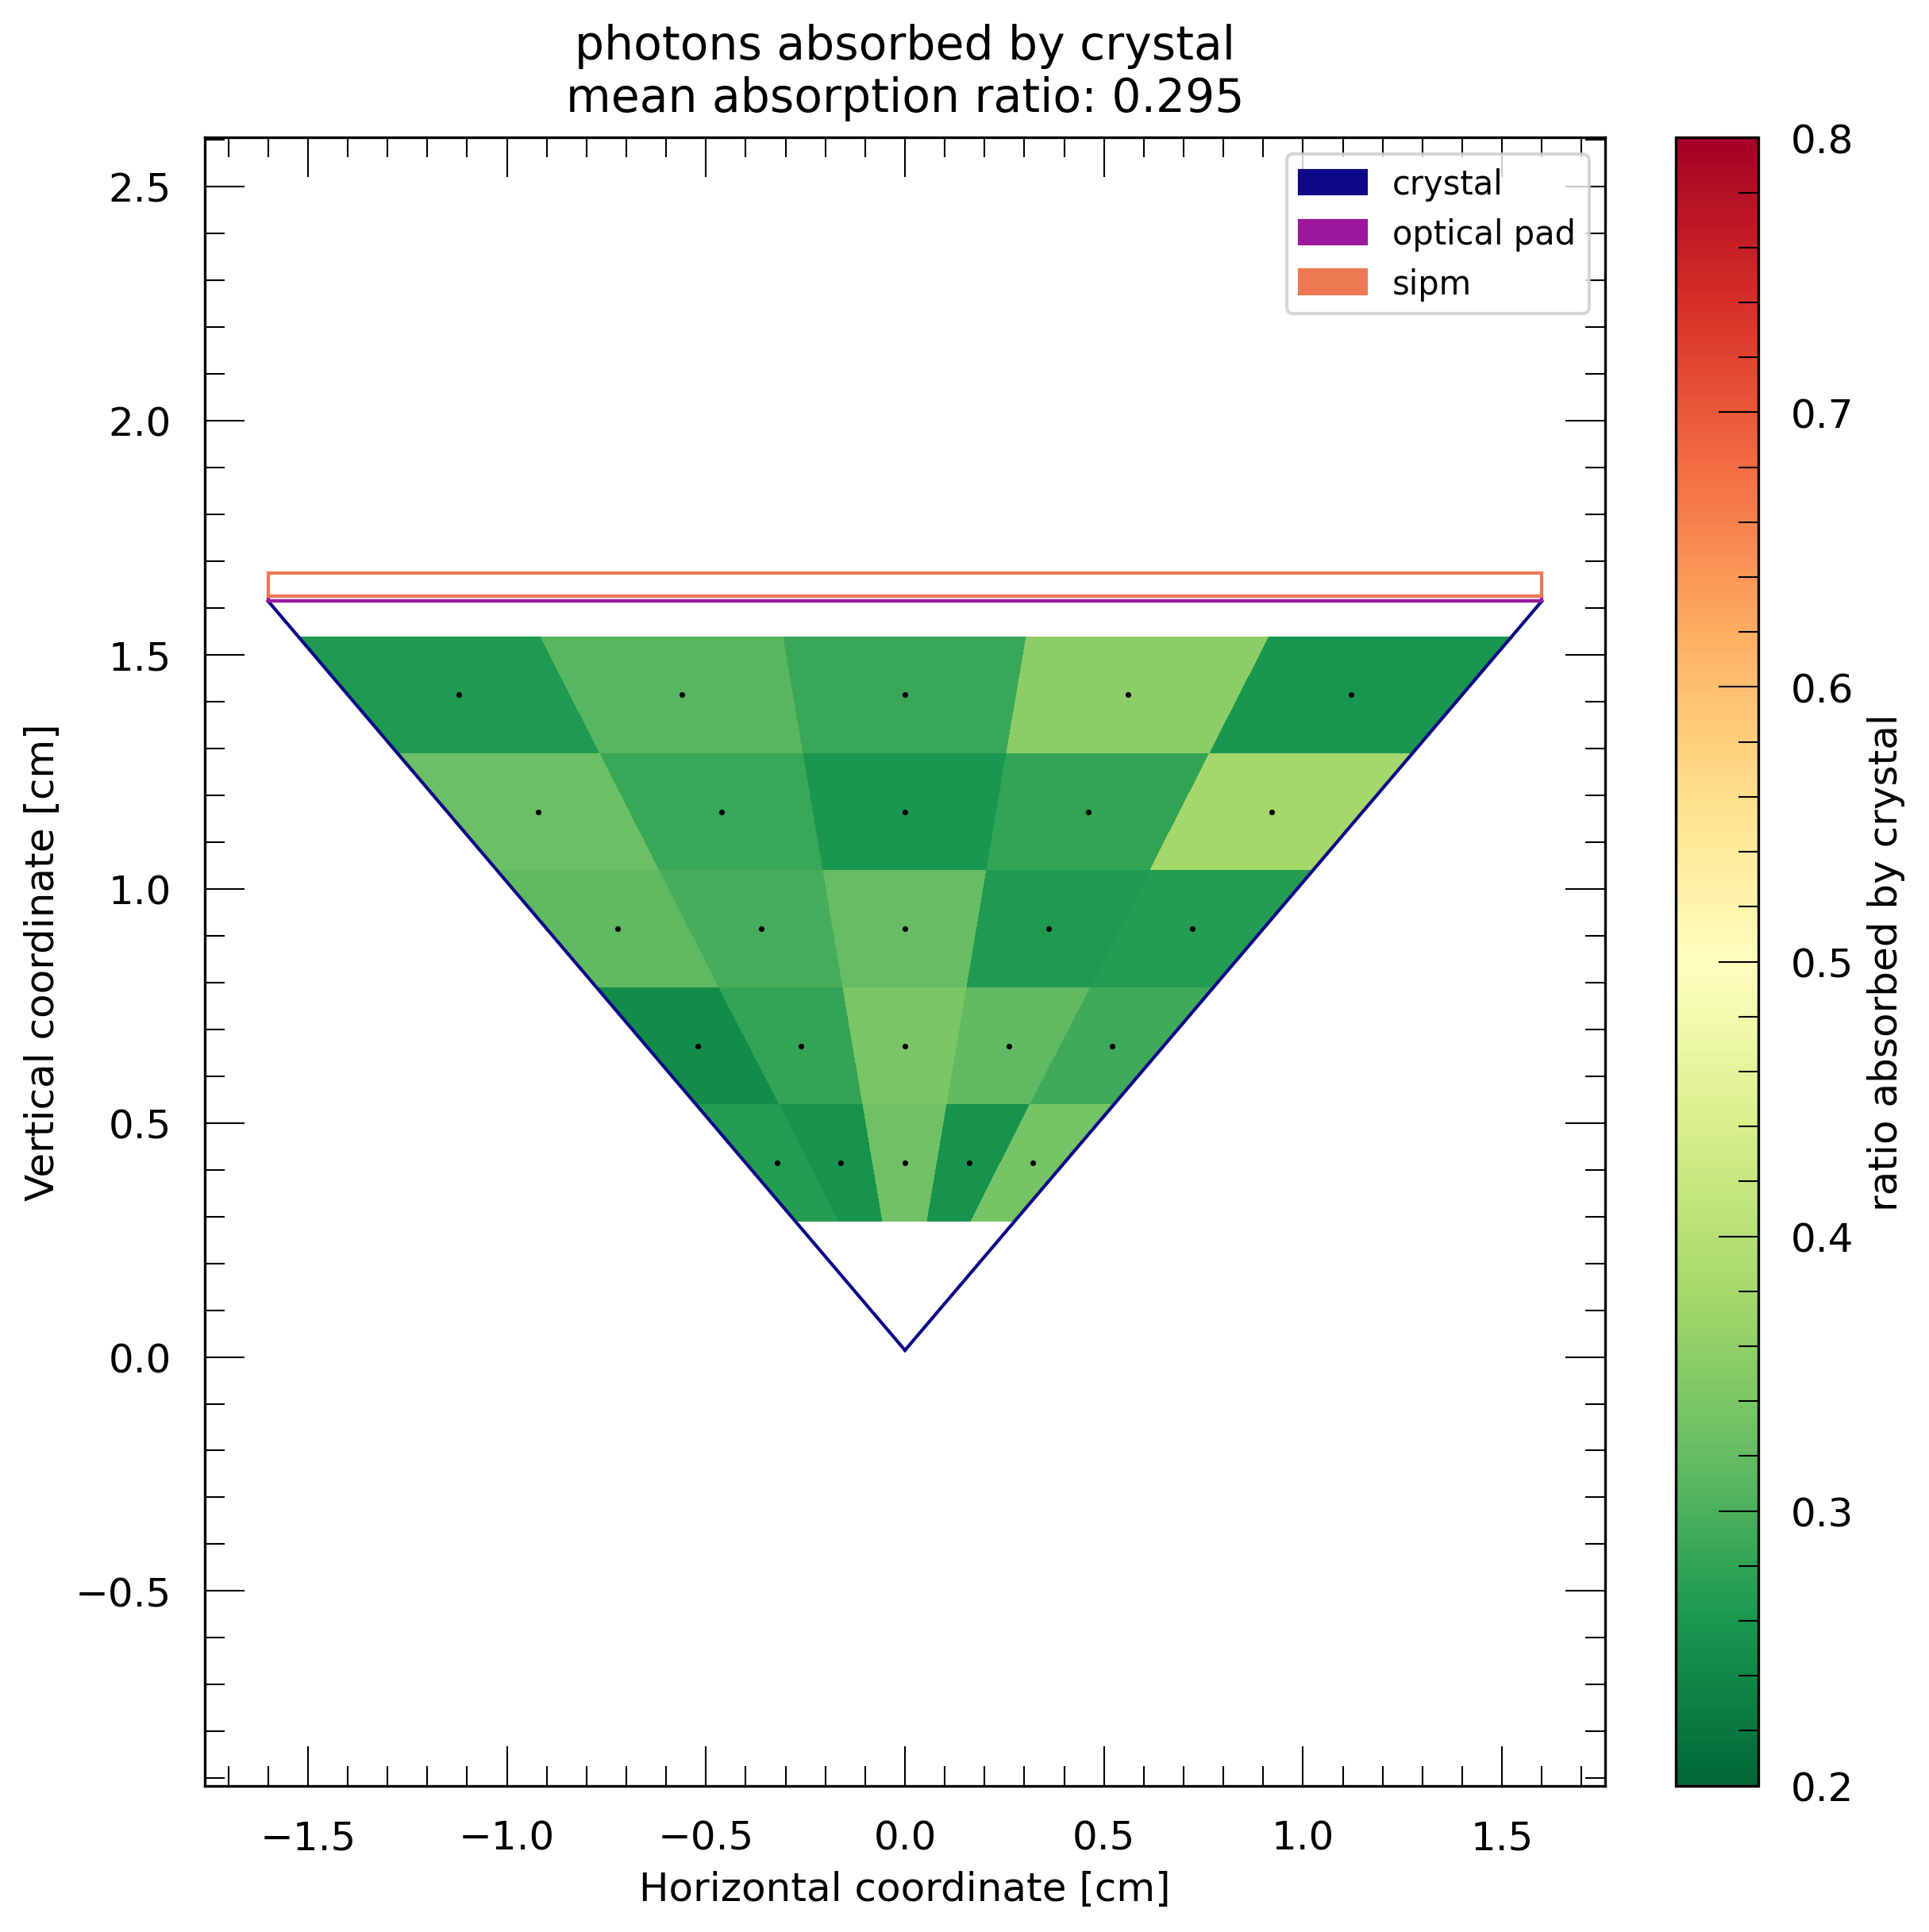

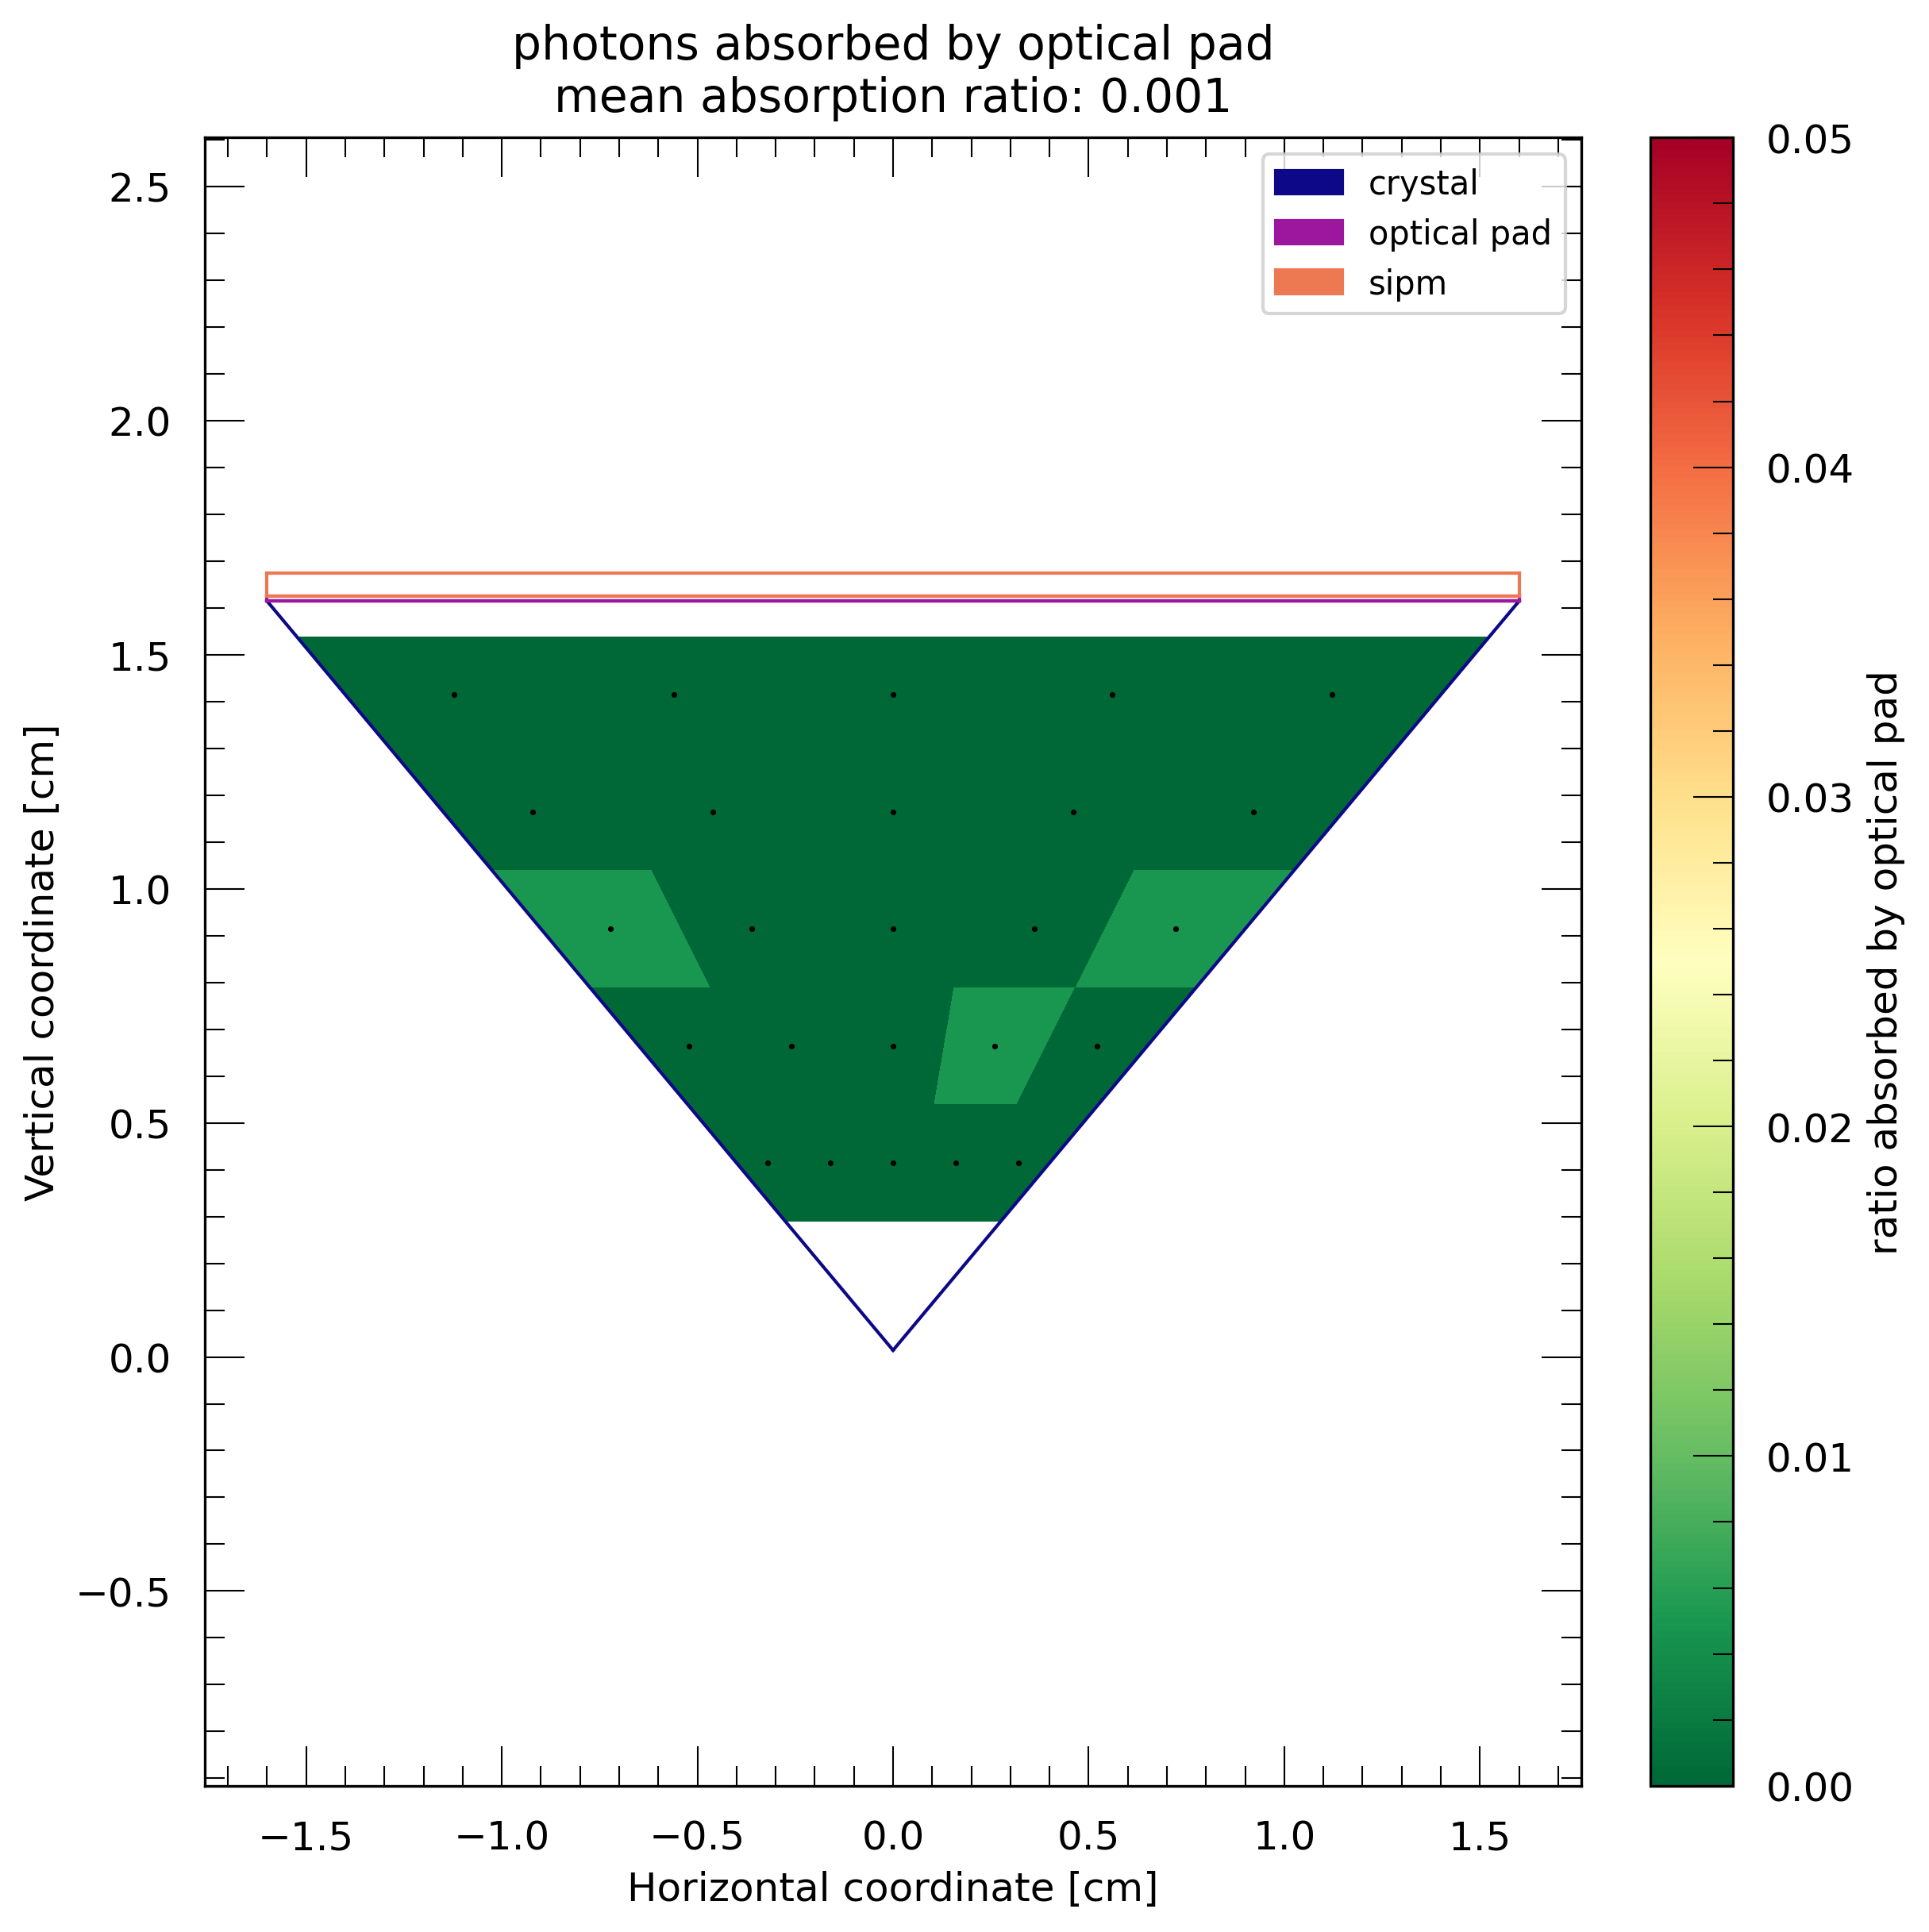

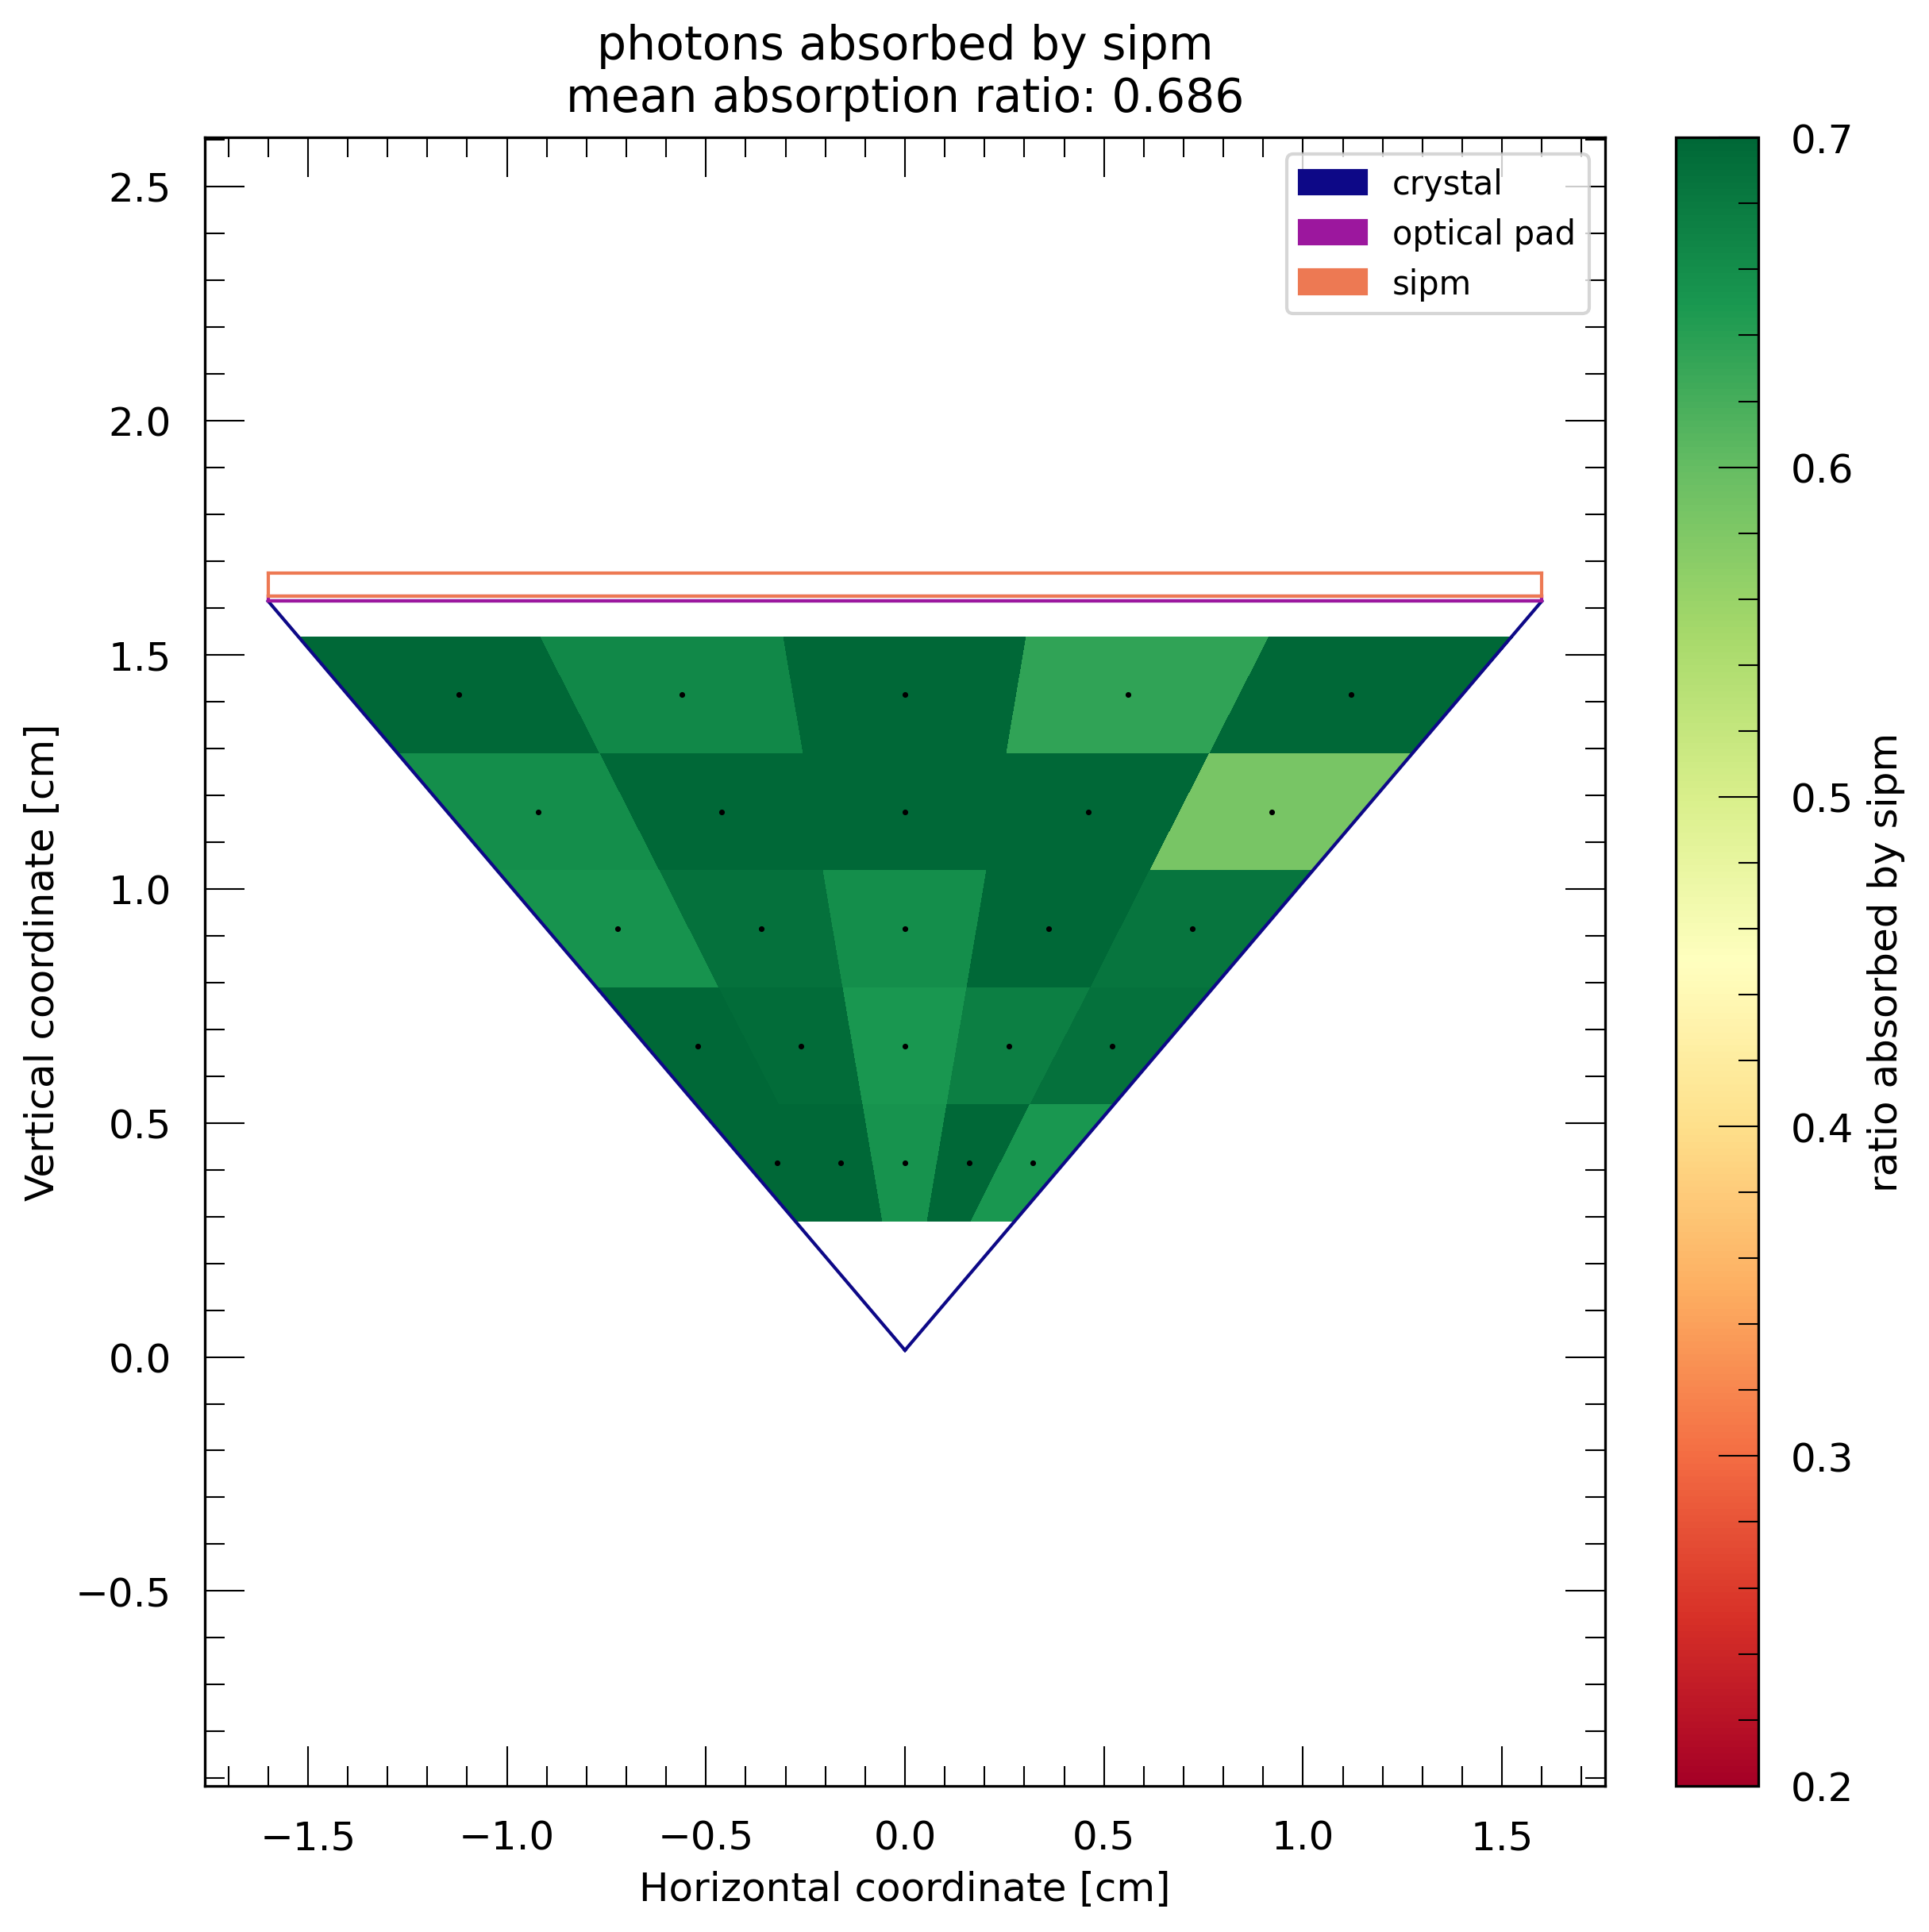

In [7]:
man.plot_all_ratios_absorbed(sipm_kwargs=dict(vmax=0.7))